In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Q1) dataset generation
point in a circle is of form (rcos(theta),rsin(theta)) where 0 < r < R

As mentioned in question points are extracted from random uniform distribution

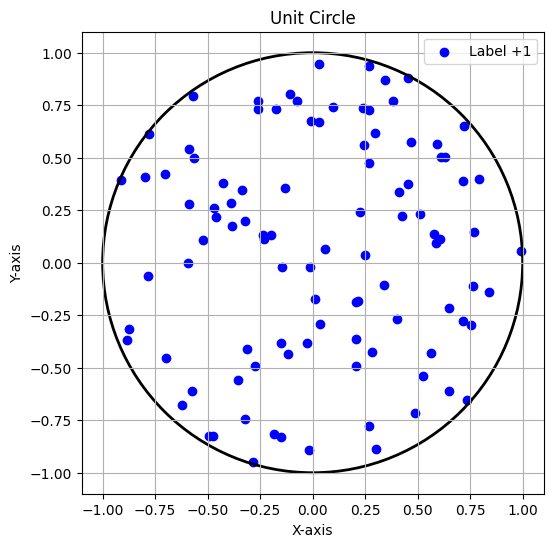

In [37]:
def generate_points_circle(radius, n, label):
    theta = np.random.uniform(0, 2 * np.pi, n)  # Random angles
    r = np.sqrt(np.random.uniform(0, radius**2, n))  # Random radius
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y)), np.full(n, label)

# Visualization
points, labels = generate_points_circle(radius=1, n=100, label=1)

# Plot points
plt.figure(figsize=(6,6))
plt.scatter(points[:, 0], points[:, 1], c='blue', label='Label +1')

# outline
circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
plt.gca().add_patch(circle)

# Formatting
plt.gca().set_aspect('equal')  # Keep aspect ratio square
plt.xlim(-1-0.1, 1+0.1)
plt.ylim(-1-0.1, 1+0.1)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Unit Circle")
plt.legend()
plt.grid()
plt.show()

Q2) dataset generation
point in a annulus is of form (rcos(theta),rsin(theta)) where Rin < r < Rout

As mentioned in question points are extracted from random uniform distribution

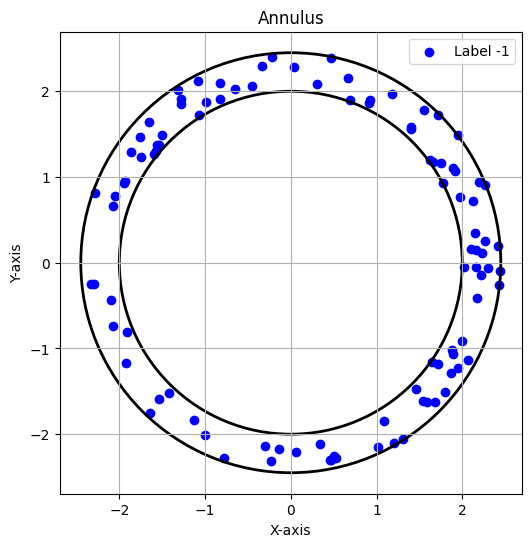

In [38]:
def generate_points_annulus(Rin,Rout, n, label):
    theta = np.random.uniform(0, 2 * np.pi, n)
    r = np.sqrt(np.random.uniform(Rin**2, Rout**2, n))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x,y)), np.full(n, label)

# Visualization
points, labels = generate_points_annulus(Rin = 2,Rout = np.sqrt(6), n=100, label=-1)

# Plot points
plt.figure(figsize=(6,6))
plt.scatter(points[:, 0], points[:, 1], c='blue', label='Label -1')

# outline
circle1 = plt.Circle((0, 0), 2, color='black', fill=False, linewidth=2)
circle2 = plt.Circle((0, 0), np.sqrt(6), color='black', fill=False, linewidth=2)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

# Formatting
plt.gca().set_aspect('equal')  # Keep aspect ratio square
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Annulus")
plt.legend()
plt.grid()

Q3) linear SVM used from scikit learn; 
decesion boundary using np.meshgrid () {credits for function to plot boundary = chatgpt}

Linear SVM Accuracy: 0.6


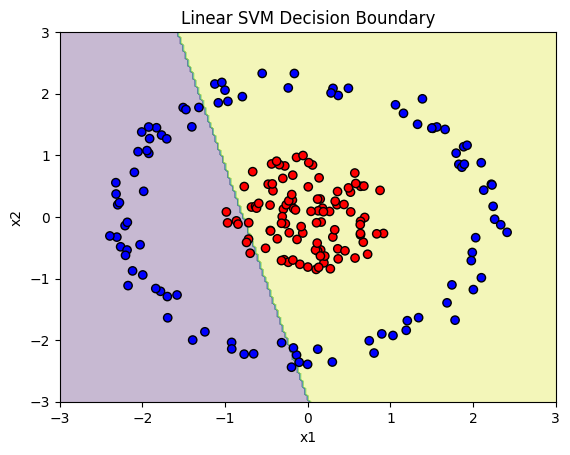

In [39]:
def decision_boundary(clf, X, y, title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))  ##syntax  chatgpt
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)    ##syntax  chatgpt
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Generate dataset
X1, y1 = generate_points_circle(radius=1, n=100, label=1)
X2, y2 = generate_points_annulus(Rin=2, Rout=np.sqrt(6), n=100, label=-1)
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))

###plot boundary
decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")





Q4  trying poly and rbf svm from scikit learn

Polynomial Kernel SVM Accuracy: 0.625


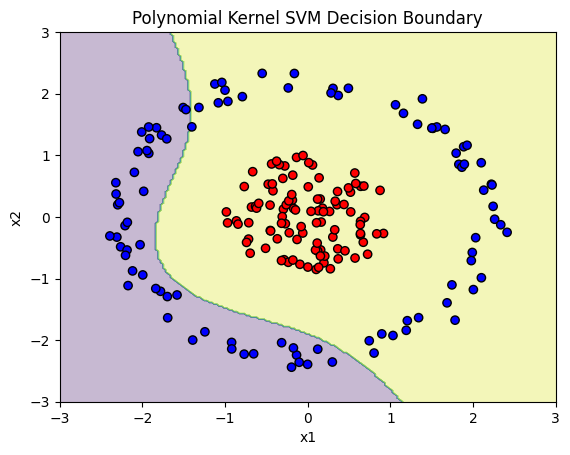

RBF Kernel SVM Accuracy: 1.0


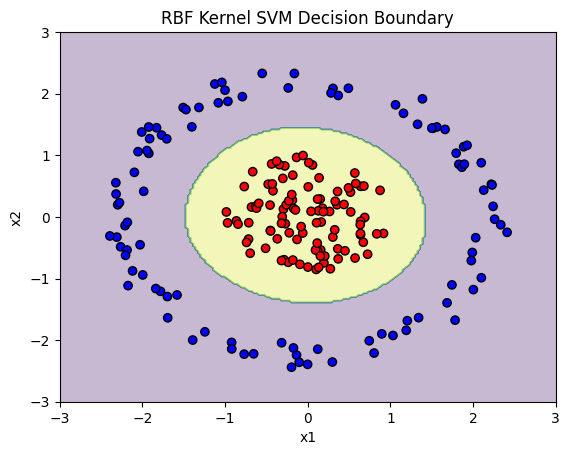

In [40]:

poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)
print("Polynomial Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_poly))
decision_boundary(poly_svm, X, y, "Polynomial Kernel SVM Decision Boundary")

# Train and evaluate RBF Kernel SVM
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
decision_boundary(rbf_svm, X, y, "RBF Kernel SVM Decision Boundary")